# MPA-MLF, Lab 2 - Clustering and K-means

## What is Clustering?

Clustering is an unsupervised machine learning technique used to group similar data points together. The goal of clustering is to find hidden patterns or structures in the data without requiring predefined labels. It is widely used in various applications such as customer segmentation, image compression, anomaly detection, and document classification.

## K-means

K-means is one of the most popular unsupervised machine learning and clustering algorithms and is well known for its simplicity. This algorithm aims to separate unlabeled data into different clusters(subgroups) with the number of clusters represented by the variable *K*. Data points in the same cluster are very similar, while data points in different clusters are very different. The similarity of data is based on some similarity metric, where the similarity metric can be distance-based, correlation-based, etc.

Advantages:
 - Simple and fast for large datasets
 - Works well with well-separated clusters

Challenges:
 - Requires specifying *K* in advance
 - Sensitive to initial centroid selection
 - Assumes spherical clusters (does not work well for non-convex shapes)

In our case, we will use distance-based metrics. Any distance-based metrics for numeric variables can be employed, for example:
 - Euclidean distance
 - Manhattan distance
 - Cosine similarity


There is an example how K-means works:

1. Imagine you have a bunch of dots scattered on a piece of paper. These dots represent data points, and the goal of the k-means algorithm is to group similar dots into clusters

2. To start, you randomly select *k* dots from the scatter plot and assign each one to be the centre of a cluster. These *k* dots are called centroids.

3. Then, you calculate the distance between each dot and each centroid and assign each dot to the closest centroid, effectively grouping the dots into k clusters.

4. Next, you recalculate the centroid of each cluster by finding the average position of all the dots in that cluster.

5. Repeat steps 3 and 4 until the centroids no longer change, meaning the clusters have stabilized.

6. Finally, the algorithm outputs the k clusters and the corresponding centroids.


In our case, we would use a Euclidian distance as a metric. Mathematically speaking, the goal would be to minimalize the following objective function:

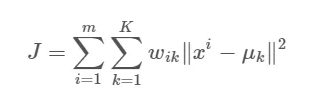

Where:
   - *k* represents the number of clusters (groups)
   - *m* represents the number of points
   - *u_k* represents centroids
   - *x_i* represents data point
   - *w_ik* represents weight where wik=1 for data point xi if it belongs to cluster k; otherwise, wik=0.

There are some typical applications of using k-means:
- Customer Segmentation: k-means can segment customers based on their demographic information or purchase behavior. This information can then be used for targeted marketing or to improve the customer experience.

- Image Compression: k-means can reduce the number of colors in an image while preserving its visual quality. This is done by replacing similar color pixels with a single color, thereby reducing the amount of data required to represent the image.

- Anomaly Detection: k-means can be used to identify outliers or anomalies in a dataset by clustering similar data points and identifying data points far from the centroids of their respective clusters.

- Document Clustering: k-means can cluster documents based on their content, for example, to group news articles by topic or categorize customer support tickets.

- Market Segmentation: k-means can be used to segment a market based on customer characteristics, such as age, income, or spending habits, in order to identify subgroups of customers with similar needs or preferences.


Recomended sources:
 - https://towardsdatascience.com/log-book-guide-to-distance-measuring-approaches-for-k-means-clustering-f137807e8e21
 - https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
 - https://realpython.com/k-means-clustering-python/
 - https://medium.com/@rishit.dagli/build-k-means-from-scratch-in-python-e46bf68aa875
 - https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
 - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

# Exercise 1 - K-means from scratch

## Implementing K-means

In this exercise, the task would be to implement a simple k-means algorithm from scratch, as described above. Let's rewrite the steps to be more readily implementable

### Steps:
  1. Specify the number of clusters *K*
  2. initialize centroids
  3. calculate the distance from centroids to all points in datasets
  4. assign data points to the closest centroids
  5. calculate objective function
  6. compute new centroids to the clusters by taking the average of all data points that belong to each cluster
  7. repeat steps 2-6. until there is no change in objective function or until the maximum n of iterations is reached


Tips:
- Avoid using loops; if it is unnecessary, instead of using loops, use NumPy functions. There is a list of NumPy functions that you might find helpful:
    - np.argmin()
    - np.where()
    - np.transpose()
    - np.random.permutation()
    - np.random.schuffle()
    - np.linalg.norm()
    - np.arange()
    - np.split()
    - np.random.choice()



- Since the initial clusters are selected randomly, the algorithm can lead to different results each time it runs. Running the algorithm multiple times and determining the result with the lowest objective function helps obtain the best results.


### Code

**Please note that the code structure provided below is only a recommendation. If you prefer, you can use your code structure. If you are familiar with OOP, you can also use it. However, writing your code in one function or not using functions at all is not the recommended approach**

In [2]:
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans

### 0. Load dataset

Use the following code to load data

Saving k_mean_points.npy to k_mean_points (1).npy


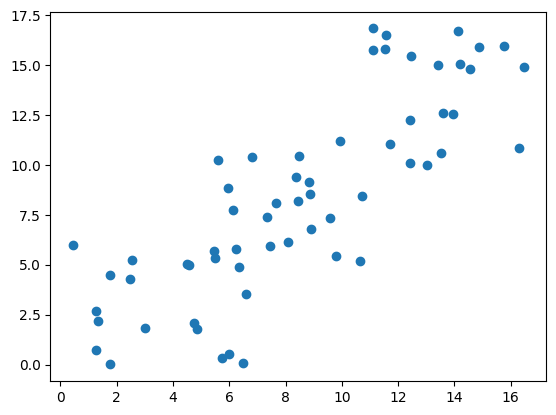

In [11]:
from google.colab import files
uploaded = files.upload()
loaded_points = np.load("k_mean_points.npy")  # Charger directement depuis le répertoire principal

plt.figure()
plt.scatter(loaded_points[:,0],loaded_points[:,1])

In [12]:
import numpy as np

def assign_clusters(points: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    """
    Assigne chaque point au cluster le plus proche en fonction de la distance euclidienne.

    :param points: Tableau des points de données (n, 2)
    :param centroids: Tableau des centroïdes actuels (k, 2)

    :return: Tableau des indices des clusters attribués à chaque point (n,)
    """
    # Calculer la distance entre chaque point et chaque centroïde
    distances = np.linalg.norm(points[:, np.newaxis] - centroids, axis=2)

    # Trouver l'indice du centroïde le plus proche pour chaque point
    cluster_assignments = np.argmin(distances, axis=1)

    return cluster_assignments


### 1. Specify number of clusters *K*

In [13]:
# Nombre de clusters
k = 3

# Initialiser les centroïdes
centroids = initialize_clusters(loaded_points, k)

# Assigner les points aux clusters
assignments = assign_clusters(loaded_points, centroids)

# Afficher les premiers résultats
print("Affectation des premiers points :", assignments[:10])


Affectation des premiers points : [0 0 2 2 0 1 0 0 1 0]


In [14]:
def update_centroids(points: np.ndarray, assignments: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Met à jour les centroïdes en prenant la moyenne des points affectés à chaque cluster.

    :param points: Tableau des points de données (n, 2)
    :param assignments: Tableau des indices des clusters affectés à chaque point (n,)
    :param k_clusters: Nombre total de clusters

    :return: Nouveau tableau des centroïdes mis à jour (k_clusters, 2)
    """
    new_centroids = np.array([points[assignments == k].mean(axis=0) for k in range(k_clusters)])
    return new_centroids


In [15]:
# Mettre à jour les centroïdes
new_centroids = update_centroids(loaded_points, assignments, k)

# Afficher les nouveaux centroïdes
print("Nouveaux centroïdes :\n", new_centroids)


Nouveaux centroïdes :
 [[ 4.40030902  2.16626027]
 [ 1.70008166  4.55158095]
 [10.5459268  10.72950705]]


In [17]:
def k_means(points: np.ndarray, k_clusters: int, max_iter: int = 100, tol: float = 1e-4) -> tuple:
    """
    Implémente l'algorithme K-means en répétant l'affectation et la mise à jour des centroïdes jusqu'à la convergence.

    :param points: Tableau des points de données (n, 2)
    :param k_clusters: Nombre de clusters
    :param max_iter: Nombre maximal d'itérations
    :param tol: Seuil de tolérance pour la convergence

    :return: Tuple contenant les centroïdes finaux et les affectations des points
    """
    # Initialiser les centroïdes
    centroids = initialize_clusters(points, k_clusters)

    for i in range(max_iter):
        # Assigner les points aux clusters
        assignments = assign_clusters(points, centroids)

        # Mettre à jour les centroïdes
        new_centroids = update_centroids(points, assignments, k_clusters)

        # Vérifier la convergence (si les centroïdes ne changent presque plus)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids  # Mettre à jour les centroïdes

    return centroids, assignments


In [18]:
# Définir le nombre de clusters
k = 3

# Lancer l'algorithme K-means
final_centroids, final_assignments = k_means(loaded_points, k)

# Afficher les résultats
print("Centroïdes finaux :\n", final_centroids)


Centroïdes finaux :
 [[ 7.7822904   7.52348016]
 [ 3.49184097  2.70762529]
 [13.24103172 13.81011385]]


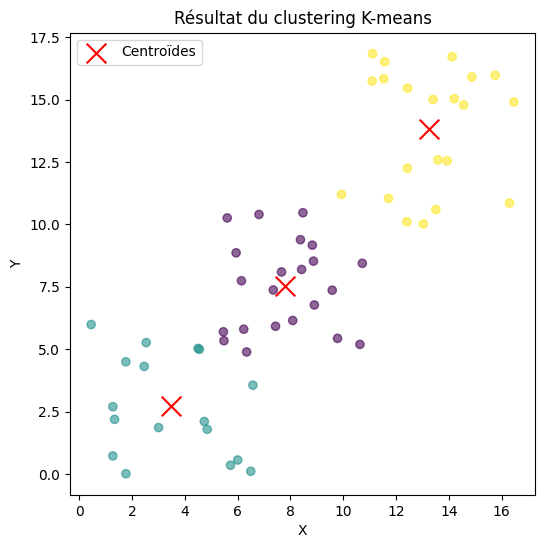

In [19]:
import matplotlib.pyplot as plt

# Affichage des clusters
plt.figure(figsize=(6, 6))
plt.scatter(loaded_points[:, 0], loaded_points[:, 1], c=final_assignments, cmap='viridis', alpha=0.6)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='x', s=200, label="Centroïdes")
plt.title("Résultat du clustering K-means")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


### 2. initialize centroids

There are more techniques, on how to change initial centroids. In out case, we will take all available points and shuffle them randomly, then we will choose first *k_clusters* points as initial centroids

In [23]:
import numpy as np

def initialize_clusters(points: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Initializes and returns k random centroids from the given dataset.

    :param points: Array of data points.
    :type points: ndarray with shape (n, 2)

    :param k_clusters: The number of clusters to form
    :type k_clusters: int

    :return: initial_clusters
    initial_clusters: Array of initialized centroids

    :rtype: np.ndarray with shape (k_clusters, 2)
    """

    # Mélanger les points de manière aléatoire
    np.random.seed(42)  # Fixe une graine pour reproductibilité
    shuffled_points = np.random.permutation(points)

    # Sélectionner les K premiers points comme centroïdes initiaux
    initial_clusters = shuffled_points[:k_clusters]

    return initial_clusters  # Bien aligné avec la définition de la fonction


In [24]:
# Définir le nombre de clusters
k = 3

# Tester l'initialisation des centroïdes
centroids = initialize_clusters(loaded_points, k)

# Afficher les centroïdes sélectionnés
print("Centroïdes initiaux :\n", centroids)



Centroïdes initiaux :
 [[4.85118811 1.78914034]
 [0.45367464 5.98985979]
 [5.94501766 8.86454253]]


In [25]:
import numpy as np

def assign_clusters(points: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    """
    Assigne chaque point au cluster le plus proche en fonction de la distance euclidienne.

    :param points: Tableau des points de données (n, 2)
    :param centroids: Tableau des centroïdes actuels (k, 2)

    :return: Tableau des indices des clusters attribués à chaque point (n,)
    """
    # Calculer la distance entre chaque point et chaque centroïde
    distances = np.linalg.norm(points[:, np.newaxis] - centroids, axis=2)

    # Trouver l'indice du centroïde le plus proche pour chaque point
    cluster_assignments = np.argmin(distances, axis=1)

    return cluster_assignments


In [26]:
# Assigner les points aux clusters
assignments = assign_clusters(loaded_points, centroids)

# Afficher les premiers résultats
print("Affectation des premiers points :", assignments[:10])


Affectation des premiers points : [0 0 2 2 0 1 0 0 1 0]


In [51]:
def update_centroids(points: np.ndarray, assignments: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Met à jour les centroïdes en prenant la moyenne des points affectés à chaque cluster.

    :param points: Tableau des points de données (n, 2)
    :param assignments: Tableau des indices des clusters affectés à chaque point (n,)
    :param k_clusters: Nombre total de clusters

    :return: Nouveau tableau des centroïdes mis à jour (k_clusters, 2)
    """
    new_centroids = np.zeros((k_clusters, points.shape[1]))  # Initialisation des centroïdes

    for k in range(k_clusters):
        cluster_points = points[assignments == k]  # Sélectionner les points du cluster
        if len(cluster_points) > 0:
            new_centroids[k] = cluster_points.mean(axis=0)  # Moyenne des points
        else:
            new_centroids[k] = points[np.random.choice(len(points))]  # Remplacement aléatoire si cluster vide

    return new_centroids


In [52]:
# Mettre à jour les centroïdes
new_centroids = update_centroids(loaded_points, assignments, k)

# Afficher les nouveaux centroïdes
print("Nouveaux centroïdes :\n", new_centroids)


Nouveaux centroïdes :
 [[ 4.40030902  2.16626027]
 [ 1.70008166  4.55158095]
 [10.5459268  10.72950705]]


In [29]:
def k_means(points: np.ndarray, k_clusters: int, max_iter: int = 100, tol: float = 1e-4) -> tuple:
    """
    Implémente l'algorithme K-means en répétant l'affectation et la mise à jour des centroïdes jusqu'à la convergence.

    :param points: Tableau des points de données (n, 2)
    :param k_clusters: Nombre de clusters
    :param max_iter: Nombre maximal d'itérations
    :param tol: Seuil de tolérance pour la convergence

    :return: Tuple contenant les centroïdes finaux et les affectations des points
    """
    # Initialiser les centroïdes
    centroids = initialize_clusters(points, k_clusters)

    for i in range(max_iter):
        # Assigner les points aux clusters
        assignments = assign_clusters(points, centroids)

        # Mettre à jour les centroïdes
        new_centroids = update_centroids(points, assignments, k_clusters)

        # Vérifier la convergence (si les centroïdes ne changent presque plus)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break  # Arrêter si les centroïdes sont stables

        centroids = new_centroids  # Mettre à jour les centroïdes

    return centroids, assignments


In [30]:
# Définir le nombre de clusters
k = 3

# Lancer l'algorithme K-means
final_centroids, final_assignments = k_means(loaded_points, k)

# Afficher les résultats
print("Centroïdes finaux :\n", final_centroids)


Centroïdes finaux :
 [[ 7.7822904   7.52348016]
 [ 3.49184097  2.70762529]
 [13.24103172 13.81011385]]


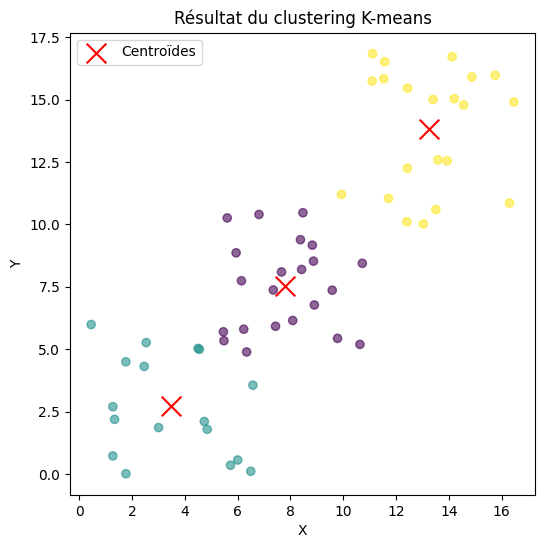

In [31]:
import matplotlib.pyplot as plt

# Affichage des clusters
plt.figure(figsize=(6, 6))
plt.scatter(loaded_points[:, 0], loaded_points[:, 1], c=final_assignments, cmap='viridis', alpha=0.6)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='x', s=200, label="Centroïdes")
plt.title("Résultat du clustering K-means")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


### 3. Calculate distance from centroids to all points in datasets

3.1 Fistly, create a function to calculate distance from one centroid to all points in the dataset

In [36]:
import numpy as np

def calculate_metric(points: np.ndarray, centroid: np.ndarray) -> np.ndarray:
    """
    Calcule la distance entre chaque point et un centroïde donné.

    :param points: Tableau des points de données (n, 2)
    :param centroid: Centroïde unique (1, 2)

    :return: Tableau des distances entre chaque point et le centroïde (n,)
    """
    distances_array = np.linalg.norm(points - centroid, axis=1)  # Distance euclidienne

    return distances_array  # Vérifie bien que cette ligne est bien alignée avec 'def'


In [37]:
# Choisir un centroïde aléatoire
random_centroid = np.array([[5.0, 5.0]])  # Exemple de centroïde

# Calculer les distances
distances = calculate_metric(loaded_points, random_centroid)

# Afficher les premières distances
print("Distances calculées :", distances[:10])


Distances calculées : [3.21430626 2.14001028 0.83834984 0.59223177 1.34765394 4.65283749
 2.90733313 0.49858972 2.47449686 5.67270736]


In [38]:
def compute_distances(points: np.ndarray, centroids_points: np.ndarray) -> np.ndarray:
    """
    Calcule la distance entre chaque point et tous les centroïdes.

    :param points: Tableau des points de données (n, 2)
    :param centroids_points: Tableau des centroïdes (k, 2)

    :return: Tableau des distances (n, k) avec la distance de chaque point à chaque centroïde.
    """
    distances = np.array([calculate_metric(points, centroid) for centroid in centroids_points]).T
    return distances


In [39]:
# Calculer les distances entre tous les points et tous les centroïdes
distances_matrix = compute_distances(loaded_points, centroids)

# Afficher la matrice de distance
print("Matrice des distances (10 premières lignes) :\n", distances_matrix[:10])


Matrice des distances (10 premières lignes) :
 [[0.         6.08146105 7.15945383]
 [2.47209265 6.59172054 5.34595279]
 [3.95759248 5.0172431  3.20187419]
 [3.6072421  5.07276863 3.55415964]
 [3.44079936 5.99133685 3.99477115]
 [6.08146105 0.         6.19827791]
 [0.33437384 5.78502142 6.86681804]
 [3.26213892 4.16042852 4.09448453]
 [4.17403823 2.20847182 4.95529102]
 [3.73197455 5.33199648 9.38701605]]


In [61]:
def compute_distances(points: np.ndarray, centroids_points: np.ndarray) -> np.ndarray:
    """
    Calcule la distance entre chaque point et tous les centroïdes.

    :param points: Tableau des points de données (n, 2)
    :param centroids_points: Tableau des centroïdes (k, 2)

    :return: Tableau des distances (n, k) avec la distance de chaque point à chaque centroïde.
    """
    distances = np.array([calculate_metric(points, centroid) for centroid in centroids_points]).T
    return distances


In [64]:
def k_means(points: np.ndarray, k_clusters: int, max_iter: int = 100, tol: float = 1e-4) -> tuple:
    """
    Implémente l'algorithme K-means en répétant l'affectation et la mise à jour des centroïdes jusqu'à la convergence.

    :param points: Tableau des points de données (n, 2)
    :param k_clusters: Nombre de clusters
    :param max_iter: Nombre maximal d'itérations
    :param tol: Seuil de tolérance pour la convergence

    :return: Tuple contenant les centroïdes finaux et les affectations des points
    """
    # Initialiser les centroïdes
    centroids = initialize_clusters(points, k_clusters)

    for i in range(max_iter):
        # Calculer les distances entre chaque point et les centroïdes
       distances = compute_distances(points, centroids)
       return centroids, assignments




In [65]:
# Définir le nombre de clusters
k = 3

# Lancer l'algorithme K-means
final_centroids, final_assignments = k_means(loaded_points, k)

# Afficher les résultats
print("Centroïdes finaux :\n", final_centroids)


Centroïdes finaux :
 [[4.85118811 1.78914034]
 [0.45367464 5.98985979]
 [5.94501766 8.86454253]]


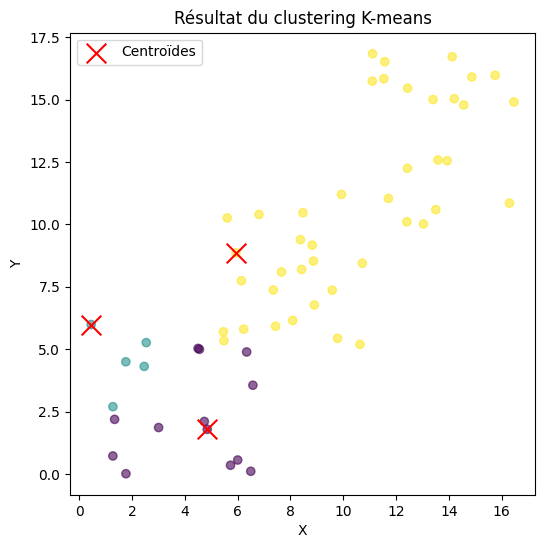

In [66]:
import matplotlib.pyplot as plt

# Affichage des clusters
plt.figure(figsize=(6, 6))
plt.scatter(loaded_points[:, 0], loaded_points[:, 1], c=final_assignments, cmap='viridis', alpha=0.6)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='x', s=200, label="Centroïdes")
plt.title("Résultat du clustering K-means")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


3.2 Secondly, create a function to calculate distance between points and all centroids using function from 3.1

In [72]:
import numpy as np

def compute_distances(points: np.ndarray, centroids_points: np.ndarray) -> np.ndarray:
    """
    Calcule la distance entre chaque point et tous les centroïdes.

    :param points: Tableau des points de données (n, 2)
    :param centroids_points: Tableau des centroïdes (k, 2)

    :return: Tableau des distances (n, k) avec la distance de chaque point à chaque centroïde.
    """
    distances_array = np.array([calculate_metric(points, centroid) for centroid in centroids_points]).T
    return distances_array



In [73]:
test_distances = compute_distances(loaded_points, final_centroids)
print("Shape des distances :", test_distances.shape)
print("Premières distances :\n", test_distances[:5])


Shape des distances : (60, 3)
Premières distances :
 [[0.         6.08146105 7.15945383]
 [2.47209265 6.59172054 5.34595279]
 [3.95759248 5.0172431  3.20187419]
 [3.6072421  5.07276863 3.55415964]
 [3.44079936 5.99133685 3.99477115]]


### 4. Assign datapoints to the closest centroids

In [79]:
def assign_centroids(distances: np.ndarray) -> np.ndarray:
    """
    Assigns each point to the closest centroid based on the distances.

    Parameters:
    :param distances: 2D array with distances of each point to each centroid.
    :type distances: ndarray with shape (k_clusters, n)

    :return: assigned_clusters
    assigned_clusters: Array indicating the closest centroid for each data point.

    :rtype:
    assigned_centroids: ndarray with shape (1, n) and dtype = np.int32
    """

    ###################################
    # Write your own code here #
import numpy as np

def assign_centroids(distances: np.ndarray) -> np.ndarray:
    """
    Assigne chaque point de données au centroïde le plus proche.

    :param distances: Tableau des distances (n, k) entre chaque point et chaque centroïde.
                      (n = nombre de points, k = nombre de centroïdes)

    :return: assigned_centroids - Tableau contenant l'index du centroïde le plus proche pour chaque point.
    """
    assigned_centroids = np.argmin(distances, axis=1)  # Trouve l'indice du centroïde le plus proche pour chaque point
    return assigned_centroids



In [80]:
test_assignments = assign_centroids(test_distances)
print("Affectation des premiers points :", test_assignments[:10])


Affectation des premiers points : [0 0 2 2 0 1 0 0 1 0]


### 5. Calculate objective function

In [81]:
def calculate_objective(assigned_centroids: np.ndarray, distances: np.ndarray) -> np.ndarray:
    """
    Calculates and returns the objective function value for the clustering.

    Parameters:
    :param assigned_centroids: Array indicating the cluster assignment for each point.
    :type assigned_centroids: ndarray with shape (1, n) and and dtype = np.int64

    :param distances: 2D array with distances of each point to each centroid
    :type distances: ndarray with shape (k_clusters, n) and and dtype = np.float64

    :return: onjective_function_value
    onjective_function_value: Objective function value.

    :rtype:
    onjective_function_value: float32


    """
    ###################################
    # Write your own code here #
import numpy as np

def calculate_objective(assigned_centroids: np.ndarray, distances: np.ndarray) -> np.float32:
    """
    Calcule et retourne la valeur de la fonction objectif pour le clustering.

    :param assigned_centroids: Tableau contenant l'index du centroïde assigné pour chaque point.
    :param distances: Matrice (n, k) contenant les distances entre chaque point et chaque centroïde.

    :return: objective_function_value - Somme des distances des points à leurs centroïdes assignés.
    """
    objective_function_value = np.sum(distances[np.arange(len(assigned_centroids)), assigned_centroids])
    return np.float32(objective_function_value)


In [82]:
test_objective = calculate_objective(test_assignments, test_distances)
print("Valeur de la fonction objectif :", test_objective)


Valeur de la fonction objectif : 294.33057


### 6. Compute new controids to the clusters by taking the average of the all data points that belong to each cluster

In [87]:
def calculate_new_centroids(points: np.ndarray, assigned_centroids: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Computes new centroids based on the current cluster assignments.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param assigned_centroids: Array indicating the closest centroid for each data point.
    :type assigned_centroids: ndarray with shape (1, n) and dtype = np.int32


    :param k_clusters: Number of clusters.
    :type k_clusters: int


    :return: new_clusters
    new_clusters: new cluster points

    :rtype:
    new_clusters: ndarray with shape (1, n) and dtype = np.float32
    """

    ###################################
    # Write your own code here #
import numpy as np

def calculate_new_centroids(points: np.ndarray, assigned_centroids: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Recalcule les centroïdes en prenant la moyenne des points appartenant à chaque cluster.

    :param points: Tableau contenant les points de données (n, 2).
    :param assigned_centroids: Tableau contenant l’index du centroïde assigné pour chaque point.
    :param k_clusters: Nombre total de clusters.

    :return: new_clusters - Tableau contenant les nouveaux centroïdes (k, 2).
    """
    new_clusters = np.zeros((k_clusters, points.shape[1]))  # Initialisation des nouveaux centroïdes

    for k in range(k_clusters):
        cluster_points = points[assigned_centroids == k]  # Sélectionner les points du cluster k
        if len(cluster_points) > 0:
            new_clusters[k] = cluster_points.mean(axis=0)  # Moyenne des points du cluster
        else:
            new_clusters[k] = points[np.random.choice(len(points))]  # Éviter cluster vide

    return new_clusters


In [88]:
test_new_centroids = calculate_new_centroids(loaded_points, test_assignments, k)
print("Nouveaux centroïdes :\n", test_new_centroids)


Nouveaux centroïdes :
 [[ 4.40030902  2.16626027]
 [ 1.70008166  4.55158095]
 [10.5459268  10.72950705]]


###   7. repeat steps 2-6. until there is no change in objective function or until the maximum n of iterations is reached

In [92]:
def fit(points: np.ndarray, k_clusters: int, n_of_oterations: int, error: float = 0.001) -> tuple:
    """
    Fits the k-means clustering model on the dataset.

    Parameters:
    :param points : Array of data points.
    :type points: ndarray with shape (n, 2) and dtype = np.float32

    :param k_clusters:  Number of clusters
    :type k_clusters: int

    :param n_of_oterations:  Maximum number of iterations
    :type n_of_oterations: int


    :param error: Threshold for convergence.
    :type error: float

    :return: centroid_points, last_objective
    centroid_points: final centroid points
    last_objective: final objective funtion

    :rtype:
    centroid_points: ndarray with shape (k_clusters, 2) and dtype = np.float32
    last_objective: float

    """

    ###################################
def fit(points: np.ndarray, k_clusters: int, n_of_iterations: int, error: float = 0.001) -> tuple:
    """
    Fits the K-means clustering model on the dataset.

    :param points: Array of data points.
    :type points: ndarray with shape (n, 2)

    :param k_clusters: Number of clusters.
    :type k_clusters: int

    :param n_of_iterations: Maximum number of iterations
    :type n_of_iterations: int

    :param error: Threshold for convergence.
    :type error: float

    :return: centroid_points, last_objective
    centroid_points: final centroid points
    last_objective: final objective function

    :rtype:
    centroid_points: ndarray with shape (k_clusters, 2)
    last_objective: float
    """

    # Initialiser les centroïdes
    centroid_points = initialize_clusters(points, k_clusters)

    last_objective = np.inf  # Mettre un objectif initial élevé

    for _ in range(n_of_iterations):
        # Étape 1 : Calculer les distances entre les points et les centroïdes
        distances = compute_distances(points, centroid_points)

        # Étape 2 : Assigner chaque point au centroïde le plus proche
        assigned_centroids = assign_centroids(distances)

        # Étape 3 : Calculer la fonction objectif
        new_objective = calculate_objective(assigned_centroids, distances)

        # Vérifier la convergence (si l'erreur est suffisamment petite, on arrête)
        if abs(last_objective - new_objective) < error:
            break

        last_objective = new_objective

        # Étape 4 : Mettre à jour les centroïdes en prenant la moyenne des points de chaque cluster
        centroid_points = calculate_new_centroids(points, assigned_centroids, k_clusters)

    return centroid_points, last_objective


    centroid_points = np.array([])
    last_objective = 10000.0

    for _ in range(n_of_oterations):
        pass

    return centroid_points, last_objective

In [94]:
final_centroids, final_objective = fit(loaded_points, k_clusters=3, n_of_iterations=100)
print("Centroïdes finaux :", final_centroids)
print("Dernière valeur de la fonction objectif :", final_objective)


Centroïdes finaux : [[ 7.7822904   7.52348016]
 [ 3.49184097  2.70762529]
 [13.24103172 13.81011385]]
Dernière valeur de la fonction objectif : 151.18689


# Evaluation methods - How to determine *k*?

One of the disadvantages of using k-means is that it requires a number of centroids *k* as an input, and it is not usually that obvious. Some methods exist to choose the correct number of centroids at the beginning. In this part of the lecture, we will describe two methods to select the right *k* value: *Elbow method* and *Silhouette analysis*

## Elbow method

The Elbow Method is a technique used in determining the optimal number of clusters for k-means clustering. The basic idea is to plot the explained variation as a function of the number of clusters and pick the elbow of the curve as the number of clusters to use. In the picture below you can see that the best *k* value is 3

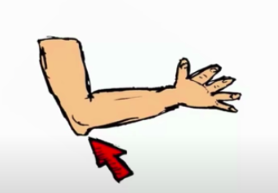 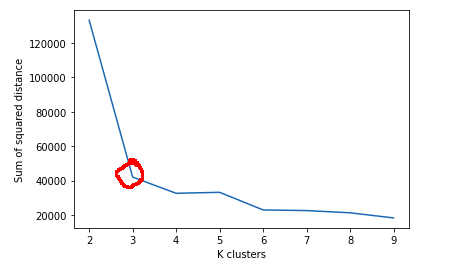

The main advantage of this method that its very simple and easy to implement, on the other hand sometimes it is not very clear where the elbow is

## Silhouette analysis

Silhouette analysis is a method to evaluate the quality of clustering results by measuring how similar each data point is to its own cluster compared to other clusters. A high silhouette score indicates that the data points in a cluster are well-separated from other clusters and that the clustering solution is good.

The silhouette score can be calculated using the following formula. This measure has a range of [-1, 1] and it is calculated for each sample in the dataset

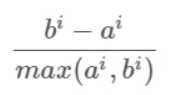

where:
 - a_i represents the average distance of that point with all other points in the same clusters
 - b_i represents the average distance of that point with all the points in the closest cluster to its cluster

if
 - is 0 –> the sample is very close to the neighboring clusters.
 - is 1 –> the sample is far away from the neighboring clusters.
 - is -1 –> the sample is assigned to the wrong clusters.

## Exercise 2 - Implementing an Elbow Method

Implementing an elbow method is simple,
 1. Create a vector of possible *k* values
 2. Fit your data using different *k* values and save the objective function value
 3. Plot objective function values in terms of *k* values
 4. Find an elbow

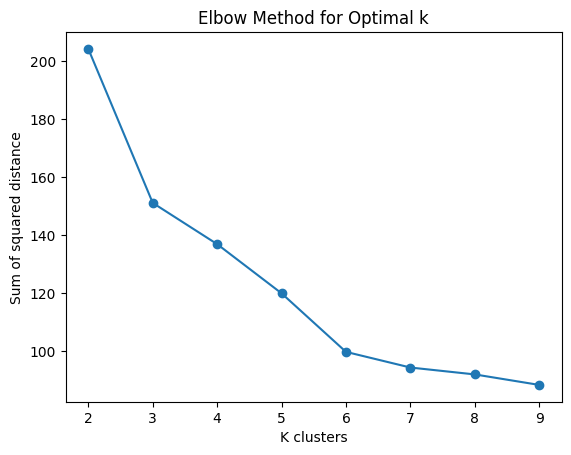

In [95]:
k_all = range(2, 10)
all_objective = []


#WRITE YOUR CODE HERE
# Boucle sur les valeurs de k pour exécuter K-means et enregistrer l'objectif
for k in k_all:
    final_centroids, final_objective = fit(loaded_points, k_clusters=k, n_of_iterations=100)
    all_objective.append(final_objective)  # Stocker la valeur de la fonction objectif

# Tracer le graphique
plt.figure()
plt.plot(k_all, all_objective, marker='o')  # Ajouter des marqueurs pour visualiser les points
plt.xlabel("K clusters")
plt.ylabel("Sum of squared distance")
plt.title("Elbow Method for Optimal k")
plt.show()


In [100]:
!pip install kneed


Valeur optimale de k selon l'Elbow Method : 6


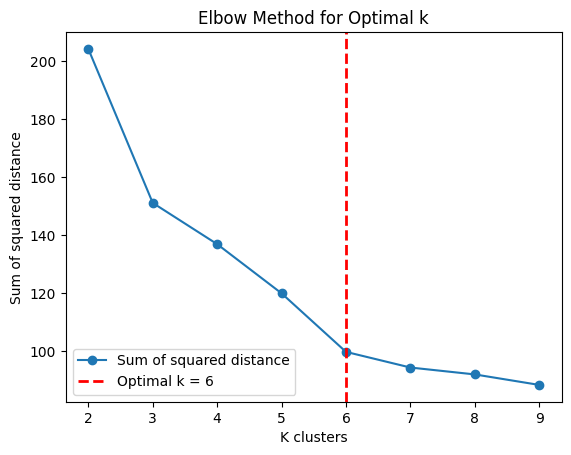

In [101]:
from kneed import KneeLocator

# Trouver le coude automatiquement
knee = KneeLocator(k_all, all_objective, curve='convex', direction='decreasing')

# Afficher la valeur optimale de k
print("Valeur optimale de k selon l'Elbow Method :", knee.knee)

# Tracer avec l'indication du coude
plt.figure()
plt.plot(k_all, all_objective, marker='o', label="Sum of squared distance")
plt.axvline(x=knee.knee, linestyle='--', color='r', label=f"Optimal k = {knee.knee}", linewidth=2)
plt.xlabel("K clusters")
plt.ylabel("Sum of squared distance")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.show()


In [102]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt


In [109]:
# Définir les valeurs de k à tester
k_values = range(2, 10)  # On teste k de 2 à 9
# Vérifier la cohérence des dimensions
if len(assignments) != len(loaded_points):
    print(f"Erreur : Mismatch entre loaded_points ({len(loaded_points)}) et assignments ({len(assignments)})")
else:
    score = silhouette_score(loaded_points, assignments)
    silhouette_scores.append(score)

silhouette_scores = []

# Calculer le score de silhouette pour chaque k
for k in k_values:
    centroids, assignments = fit(loaded_points, k_clusters=k, n_of_iterations=100)

    # Convertir en entiers et en 1D
    assignments = np.array(assignments).astype(int).ravel()  # Utiliser ravel() ou flatten()
     # Convertir en entiers et en 1D
    assignments = np.array(assignments).astype(int).ravel()  # Utiliser ravel() ou flatten()

    # Debug : Vérifier le format de assignments
    print(f"assignments type: {type(assignments)}")
    print(f"assignments shape: {np.shape(assignments)}")
    print(f"assignments values: {assignments}")


    # Calculer le score de silhouette
    score = silhouette_score(loaded_points, assignments)
    silhouette_scores.append(score)

# Afficher les résultats
print("Scores de silhouette pour chaque k :", silhouette_scores)


Erreur : Mismatch entre loaded_points (60) et assignments (1)
assignments type: <class 'numpy.ndarray'>
assignments shape: (1,)
assignments values: [204]


ValueError: Found input variables with inconsistent numbers of samples: [60, 1]

# Exercise 3 - Image Compression

In this exercise, the task would be to implement simple image compression using the k-means algorithm. You can use an image in the directory *Data\\*. This time, we will use a library that implements k-means for us - *sklearn* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. To load the image you can use *openCv* or *matplotlib* (or anything else)

### Steps

   1. Firstly reshape your image to 2D array with shape (image.width*image.height, n_of_colour_channels)
   2. Initialize the K_means algorithm, where K would be equal to the number of colours in the compressed image
   3. check cluster centroids and convert them to integers - these are your new colours (kmeans.cluster_centers_ could be useful)
   4. replace your 2D array colors with newly generated colors
   5. reshape your 2D array to the original image shape

Tips:
- it takes a couple of seconds to compress the attached image. For debugging purposes, you can use a custom smaller image
- the implementation can be done in a single function

In [113]:
from matplotlib.image import imread
from sklearn.cluster import KMeans
import numpy as np

### 1. load image

In [115]:
import requests

# URL directe de l'image sur GitHub (remplace par le bon lien brut)
image_url = "https://raw.githubusercontent.com/MPA-MLF/Exercises/main/Lab_02/Data/fish.jpg"

# Nom du fichier pour l'enregistrer localement
image_path = "fish.jpg"

# Télécharger et enregistrer l'image
response = requests.get(image_url, stream=True)
if response.status_code == 200:
    with open(image_path, "wb") as file:
        for chunk in response.iter_content(1024):
            file.write(chunk)
    print(f"✅ Image téléchargée avec succès : {image_path}")
else:
    print(f"❌ Erreur lors du téléchargement. Code : {response.status_code}")



✅ Image téléchargée avec succès : fish.jpg


In [116]:
from sklearn.cluster import KMeans

def compress_image(image: np.ndarray, number_of_colours: int) -> np.ndarray:
    """
    Compresses the given image by reducing the number of colours used in the image.

    This function applies k-means clustering to group the pixel colours of the image
    into 'number_of_colours' clusters. Each pixel's colour in the image is then replaced
    with the colour of the closest centroid of these clusters. This process effectively
    reduces the number of colours in the image, resulting in compression.

    Parameters:
    image (np.array): The original image is represented as a 3D numpy array
                      (height × width × color_channels).
    number_of_colours (int): The number of colours to reduce the image to.

    Returns:
    np.ndarray: The compressed image as a numpy array in the same shape as the input.
    """

    # Reshaper l'image en un tableau 2D (nb_pixels, 3)
    h, w, c = image.shape
    pixels = image.reshape(-1, c)

    # Appliquer K-means pour trouver les clusters de couleurs
    kmeans = KMeans(n_clusters=number_of_colours, random_state=42, n_init=10)
    kmeans.fit(pixels)

    # Remplacer les couleurs originales par les couleurs des centroïdes trouvés
    compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]

    # Reshaper en image 3D
    compressed_image = compressed_pixels.reshape(h, w, c).astype(np.uint8)

    return compressed_image


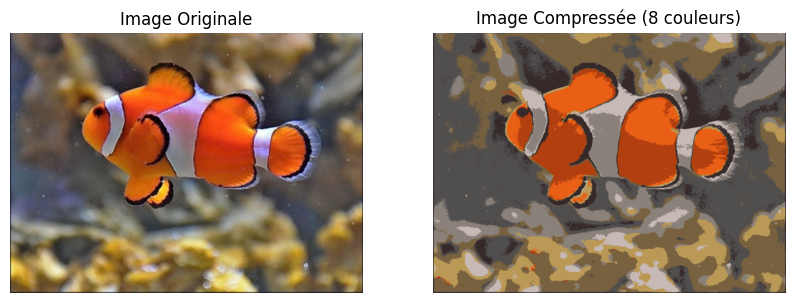

In [118]:
# Charger l'image avec PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

image_path = "fish.jpg"  # Chemin de l'image téléchargée
img = Image.open(image_path)
img = img.convert("RGB")  # Convertir en RGB si nécessaire
image_array = np.array(img)  # Convertir en tableau numpy

# Choisir le nombre de couleurs pour la compression
num_colours = 8  # Change ce nombre pour tester différentes compressions

# Appliquer la compression
compressed_img = compress_image(image_array, num_colours)

# Afficher l'image originale et compressée
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_array)
plt.title("Image Originale")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(compressed_img)
plt.title(f"Image Compressée ({num_colours} couleurs)")
plt.axis("off")

plt.show()


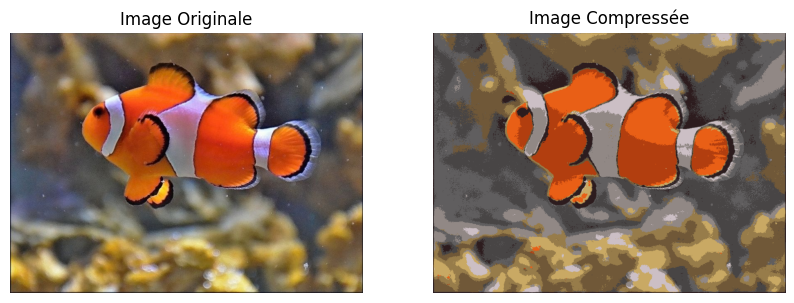

In [120]:
import matplotlib.pyplot as plt

# Charger l'image originale
original_image = plt.imread("fish.jpg")

# Appliquer la compression avec un nombre de couleurs choisi
compressed_image = compress_image(original_image, number_of_colours=10)  # Change ce nombre pour tester

# Affichage des images comparées
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Image originale
axes[0].imshow(original_image)
axes[0].set_title("Image Originale")
axes[0].axis("off")

# Image compressée
axes[1].imshow(compressed_image)
axes[1].set_title("Image Compressée")
axes[1].axis("off")

plt.show()


In [122]:
original_colors = len(set([tuple(pixel) for row in original_image for pixel in row]))
compressed_colors = len(set([tuple(pixel) for row in compressed_image for pixel in row]))

compression_rate = (1 - (compressed_colors / original_colors)) * 100

print(f"Taux de compression : {compression_rate:.2f}%")


Taux de compression : 99.99%


In [123]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse

# Calcul du PSNR et MSE
mse_value = mse(original_image, compressed_image)
psnr_value = psnr(original_image, compressed_image)

print(f"MSE (Erreur Moyenne Quadratique) : {mse_value:.4f}")
print(f"PSNR (Rapport Signal-Bruit) : {psnr_value:.2f} dB")


MSE (Erreur Moyenne Quadratique) : 236.8466
PSNR (Rapport Signal-Bruit) : 24.39 dB


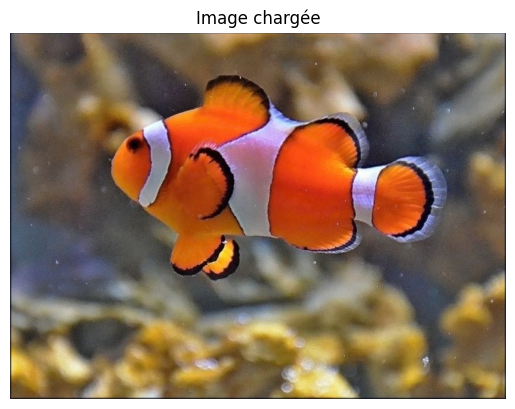

In [125]:
from matplotlib.pyplot import imread

# Charger l'image depuis le fichier
loaded_image = imread("fish.jpg")  # Vérifie que l'image est bien dans le bon dossier

# Vérifier l'affichage
plt.imshow(loaded_image)
plt.axis("off")
plt.title("Image chargée")
plt.show()


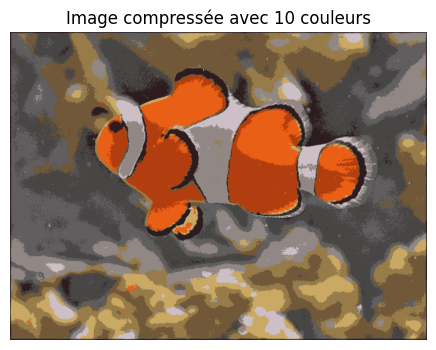

In [126]:
# Choisir le nombre de couleurs pour la compression
num_colors = 10  # Tu peux tester avec différentes valeurs

# Appliquer la compression K-Means
compressed_img = compress_image(loaded_image, num_colors)

# Afficher l'image compressée
plt.figure(figsize=(6, 4))
plt.imshow(compressed_img)
plt.axis("off")
plt.title(f"Image compressée avec {num_colors} couleurs")
plt.show()


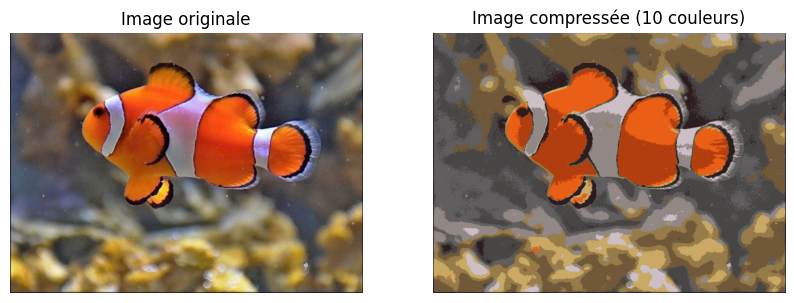

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Image originale
axes[0].imshow(loaded_image)
axes[0].axis("off")
axes[0].set_title("Image originale")

# Image compressée
axes[1].imshow(compressed_img)
axes[1].axis("off")
axes[1].set_title(f"Image compressée ({num_colors} couleurs)")

plt.show()
